In [37]:
from pathlib import Path

# Core Math and Visualization Libraries
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import seaborn as sns

# sci-kit (sklearn) is a Machine Learning Library
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB 
from sklearn.utils.multiclass import unique_labels

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords



In [38]:
%pip install pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Q1. there are 5574 samples in the dataset
Q2. There are two labels, spam and ham
Q3. The dataset is not balanced, there seems to be more ham than spam. There is 4824 ham and 747 spam.

In [39]:
CWD = Path.cwd()
dataset_filepath = CWD.joinpath('dataset','SMSSpamCollection')

Q4.  CWD stands for current working directory, it returns the path of the directory python is running. The joinpath method combines paths into one single path
Q5. Two additional methods in a path are resolve() which resolves symbolic links. Another path is exists(). This path return true if the path points to an existing directory.

In [40]:

data = pd.read_csv(dataset_filepath, encoding="utf-8", delimiter="\t")
print(data.head())

types_of_values = data['sentiment'].value_counts()
types_of_values

  sentiment                                            message
0       ham                      Ok lar... Joking wif u oni...
1      spam  Free entry in 2 a wkly comp to win FA Cup fina...
2       ham  U dun say so early hor... U c already then say...
3       ham  Nah I don't think he goes to usf, he lives aro...
4      spam  FreeMsg Hey there darling it's been 3 week's n...


sentiment
ham     4824
spam     747
Name: count, dtype: int64

Q6. You can use .iloc[] where the syntax is df.iloc[row_index] to access indiviudal rows from the CSV file

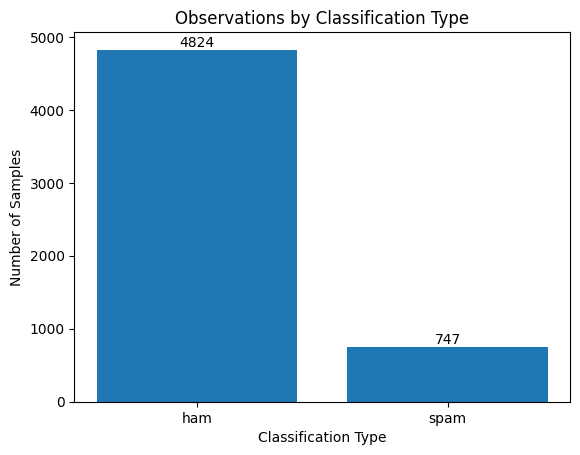

In [41]:
label_counts = data['sentiment'].value_counts()

labels = label_counts.index
counts = label_counts.values

plt.bar(labels, counts)

plt.title("Observations by Classification Type")
plt.xlabel("Classification Type")
plt.ylabel("Number of Samples")

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

Q7. The value_counts method is used to count the times unique values are in a series and returns a pandas series

In [42]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['sentiment'], test_size=0.2, random_state=42, )


Q8. This functions splits a dataset. It splits into one subset for training a model and another subset for testing the model. Additional parameters can include test_size, train_size, and random_state. Test_size helps with specifying the  proportion of a dataset to include in a test split. Train_size helps controls the size of the training set. Random_state will control the randomness of a split. It will make sure that the same split happens each time a code is run.

In [43]:
import string

def preprocess_text(text: str) -> str:
    """
    This method processes a text by lower the letters, removing punctuation, removing stopwords, and lemmatizing the words.

    """
    
    lowercase_text = text.lower()
    lowercase_text = lowercase_text.translate(str.maketrans('', '', string.punctuation))
    split_text = lowercase_text.split()

    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in split_text if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    return " ".join(lemmatized_words)

The apply method can apply a function along the axis of data/series. This allows the preprocess function to be applies to each row of the dataset. Apply applies the function to each element so therefore preprocess_text could be applied to each row of the dataset. To use the apply method you could use .apply() and put the function into the parantheses.

In [44]:
preprocessed_X_train = X_train.apply(preprocess_text)
preprocessed_X_test = X_test.apply(preprocess_text)

In [45]:
def create_bag_of_words_model(preprocessed_X_train):
    """
    This method creates a bag of words model from a preprocessed text.

    """
    
    vectorizer = CountVectorizer()
    vectorized_data = vectorizer.fit_transform(preprocessed_X_train)
    return vectorized_data, vectorizer
    

def create_tfidf_model(preprocessed_X_train):
    """
    This method creates a tfidf model from a preprocessed text.

    """
    
    vectorizer = TfidfVectorizer()
    vectorized_data = vectorizer.fit_transform(preprocessed_X_train)
    return vectorized_data, vectorizer

In [53]:
def train_model(x_train, y_train):
    """
    This method trains a naive bayes model.

    """
    
    model = MultinomialNB()
    model.fit(x_train, y_train)
    return model



Q10. CountVectorizer and Tfidvectorizer are classes for coverting a collection of text documents into data that can later be used by machine learning. Countvectorizer converts the collection SMSSpamCollection into token counts which is bag of words. The Tfidvectorizer turns SMSSpamCollection into TF-IDF which counts how many times a word appears in a document. This is similar to preprocessing text that we have used before.
Q11. The fit_transform method is used to learn from data and apply the transformation as well.
Q12. Two additional methods are get_feature_names_out() and transform(). Get_feature_names_out() returns the list of words or tokens that were learned and gives you the unique terms used in the document. Transform() coverts new data into the same space that was learned.

In [56]:
x_train, vectorizer = create_bag_of_words_model(preprocessed_X_train)
x_test = vectorizer.transform(preprocessed_X_test)

In [58]:
model = train_model(x_train, y_train)

In [59]:
def train_model(x_train, y_train):
    """
    This method trains a naive bayes model.

    """
    
    model = MultinomialNB()
    model.fit(x_train, y_train)
    return model

In [60]:
model = train_model(x_train, y_train)

Q13. Additional methods are predict() and score(). Predict() can predict class labels for data and score() can calculate model accuary of a test set.
Q14. Another variation is the Gaussian Naive Bayes (GuassianNB) or Bernoulli Naive Bayes

In [61]:
def evaluate_model(model, x_test, y_test):
    """
    This method evaluates a model.

    """
    
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    return accuracy, confusion

In [62]:
accuracy, cf_matrix = evaluate_model(model, x_test, y_test)

In [63]:
print(f"The accuracy is: {accuracy: .2f}")

The accuracy is:  0.98


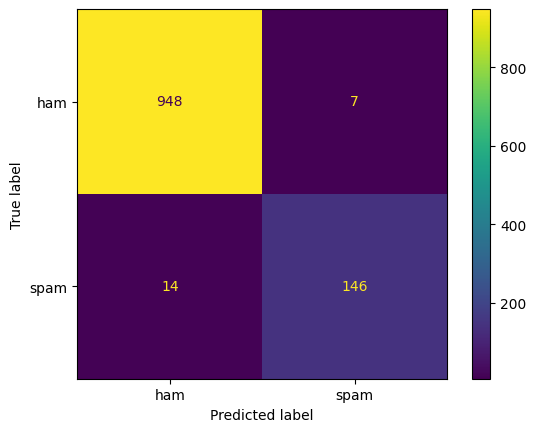

In [64]:
ConfusionMatrixDisplay(cf_matrix, display_labels=model.classes_).plot()